In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm

In [2]:
happ = pd.read_csv("D:\data science whole\dataset\DSData-master\happiness_score_dataset.csv")
happ

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


<AxesSubplot:>

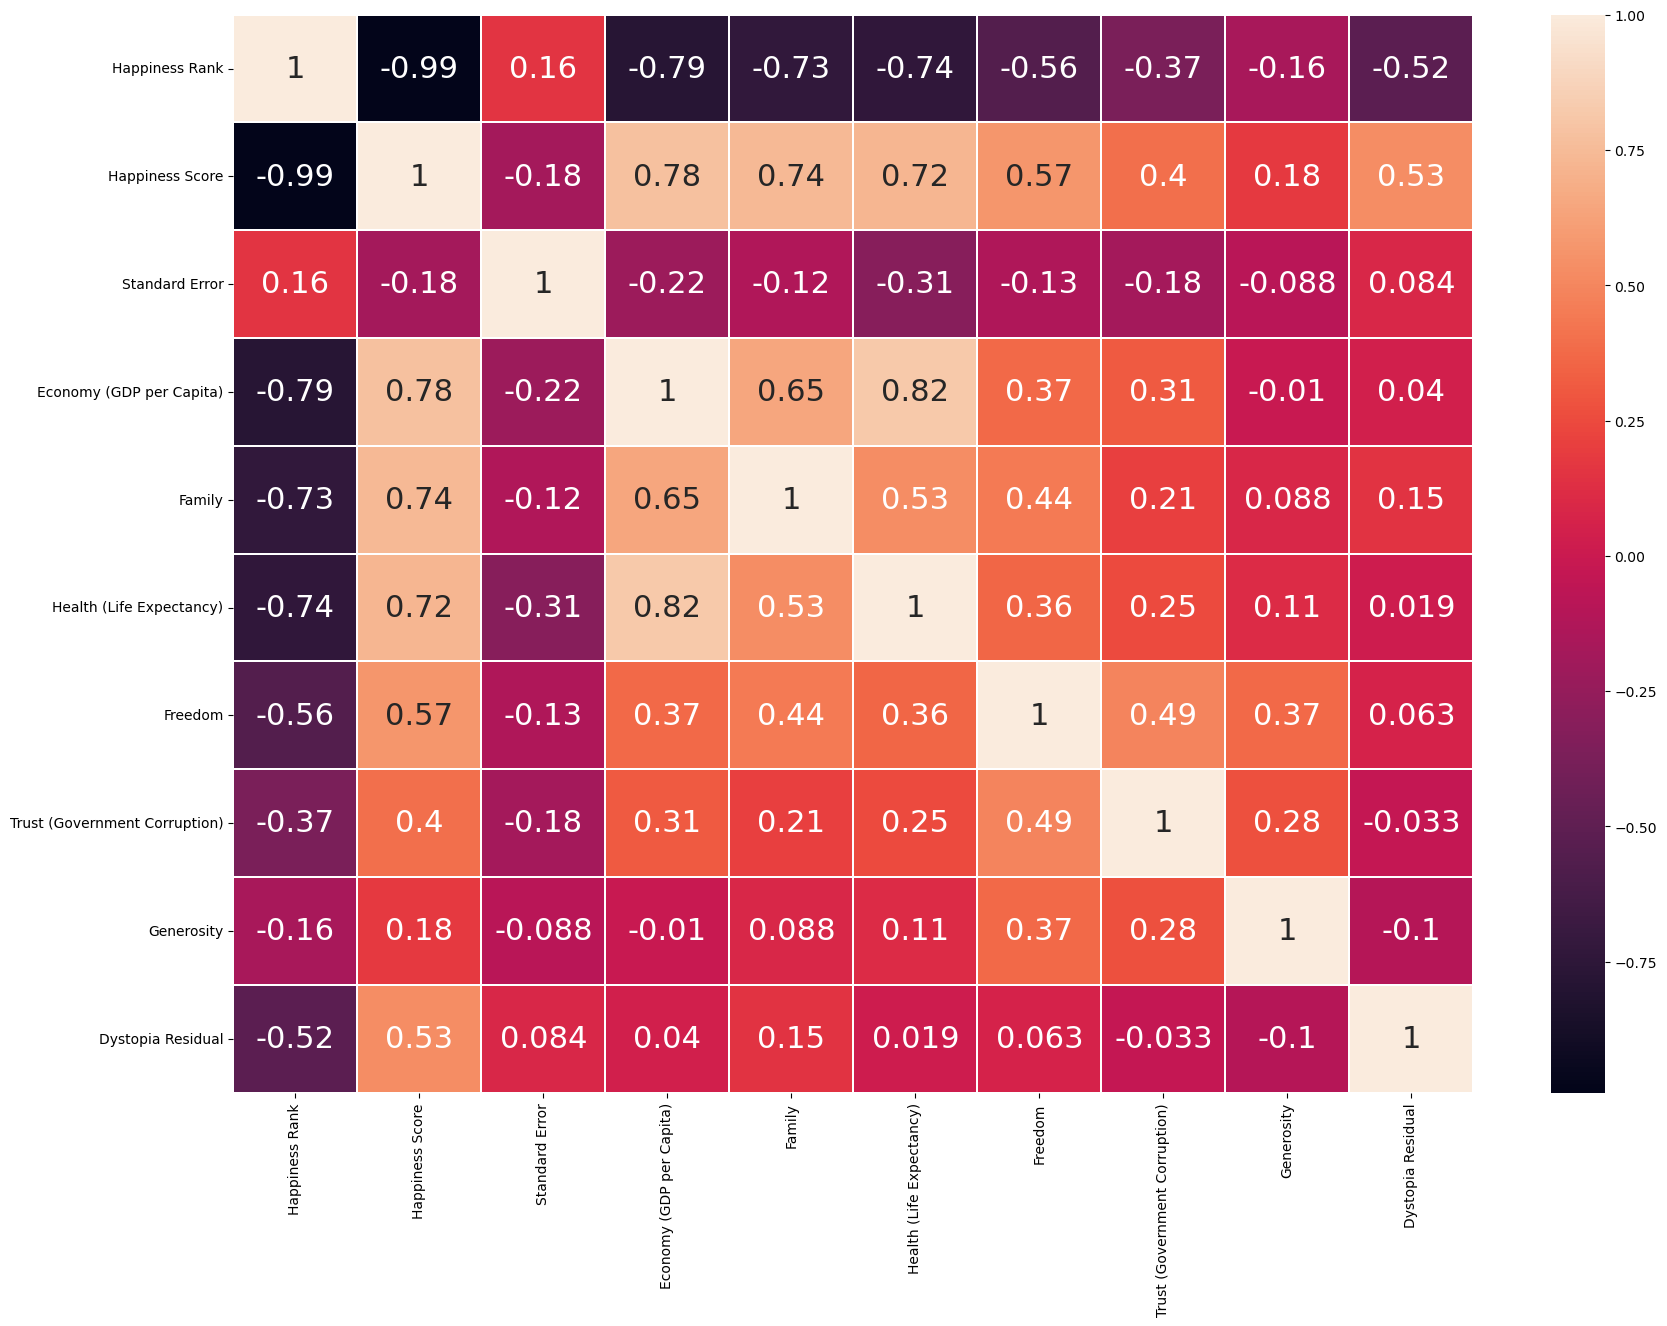

In [3]:
plt.figure(figsize=(20, 14))
sns.heatmap(happ.corr(), annot=True, linewidth=0.1, annot_kws={"fontsize": 22})

<AxesSubplot:xlabel='Standard Error', ylabel='Happiness Score'>

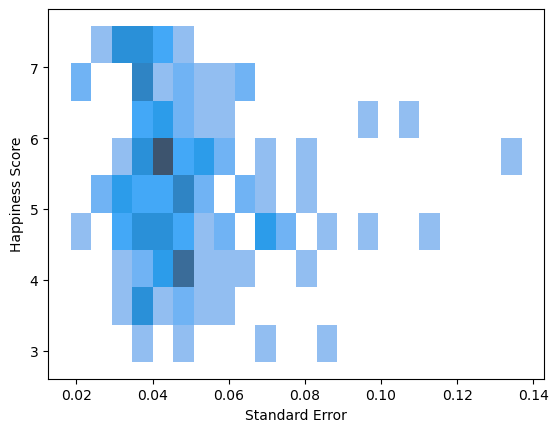

In [57]:
sns.histplot(data = happ, x='Standard Error', y='Happiness Score')

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

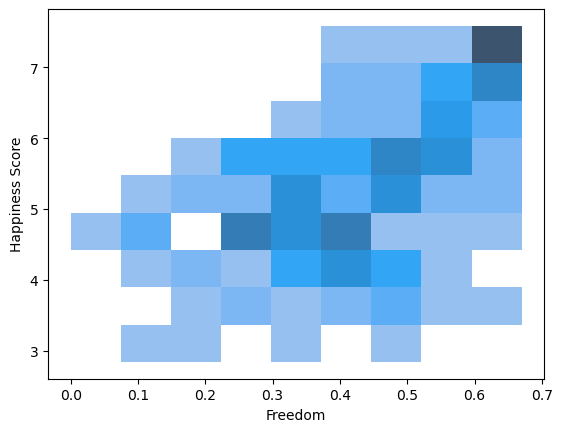

In [58]:
sns.histplot(data = happ, x='Freedom', y='Happiness Score')

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

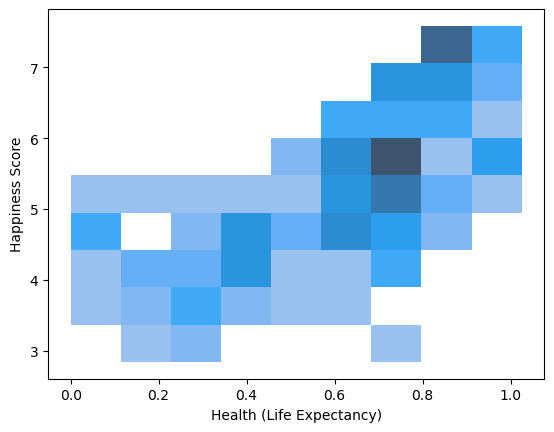

In [59]:
sns.histplot(data = happ, x='Health (Life Expectancy)', y='Happiness Score')

# negtive relationship between happines rank and economy but sort of linear

<AxesSubplot:xlabel='Happiness Rank', ylabel='Economy (GDP per Capita)'>

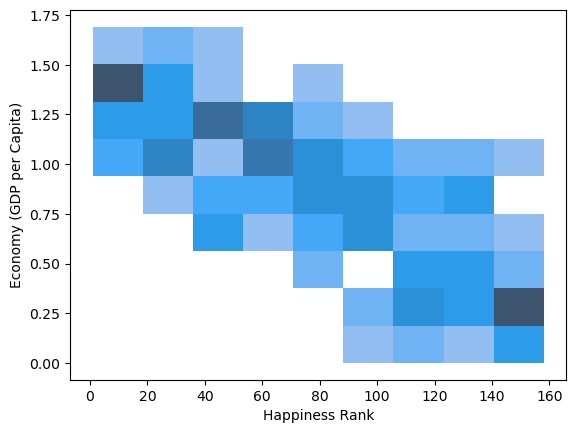

In [4]:
sns.histplot(data=happ, x='Happiness Rank', y='Economy (GDP per Capita)')

In [5]:
# linear relationship between these two variables

<AxesSubplot:xlabel='Family', ylabel='Economy (GDP per Capita)'>

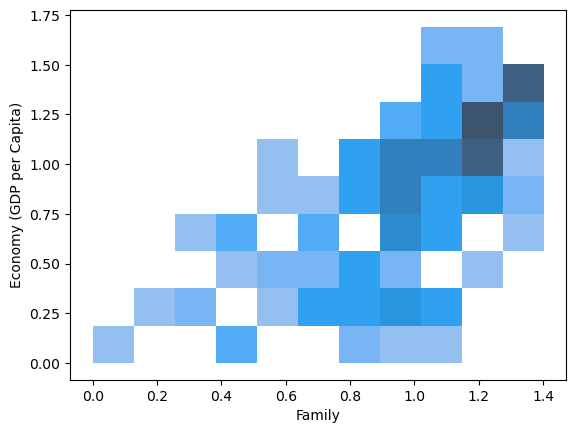

In [6]:
sns.histplot(data=happ, x='Family', y='Economy (GDP per Capita)')

# A correlation coefficient of 0 to 0.3 is generally considered weak
# A correlation coefficient of 0.3 to 0.7 is generally considered moderate
# A correlation coefficient of 0.7 to 1.0 is generally considered strong

In [7]:
for i in happ.columns:
    if happ[i].dtype !='object':
        q75 = happ[i].quantile(0.75)
        q25 = happ[i].quantile(0.25)
        iqr = q75 - q25
        high_fence = q75 + 1.5*iqr
        lower_fence = q25 - 1.5*iqr
        happ1 = happ[(happ[i] >= lower_fence) & (happ[i] <= high_fence)]

In [8]:
filtered = happ1.drop(['Standard Error','Generosity'], axis=1)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
cate1 = [i for i in filtered.columns if filtered[i].dtype =='object']
Categorical = filtered[cate1]
Categorical

,Country,Region
0,Switzerland,Western Europe
1,Iceland,Western Europe
2,Denmark,Western Europe
3,Norway,Western Europe
4,Canada,North America
...,...,...
151,Burkina Faso,Sub-Saharan Africa
152,Afghanistan,Southern Asia
154,Benin,Sub-Saharan Africa
156,Burundi,Sub-Saharan Africa


In [11]:
ohe = OneHotEncoder(drop='first')

transformed1 = ohe.fit_transform(Categorical).toarray()
print(transformed1)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [12]:
transformed2 = pd.DataFrame(transformed1)
transformed2

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
cate = [i for i in filtered.columns if filtered[i].dtype !='object']
numerical = pd.DataFrame(filtered[cate])
numerical

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176
...,...,...,...,...,...,...,...,...
151,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,1.46494
152,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,1.95210
154,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,1.63328
156,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,1.83302


In [14]:
new = pd.merge(numerical, transformed2, left_index=True, right_index=True)
new

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Dystopia Residual,0,1,...,151,152,153,154,155,156,157,158,159,160
0,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,2.51738,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,2.70201,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,2.49204,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,2.46531,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,2.45176,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,149,3.667,0.34193,0.76062,0.15010,0.23501,0.05269,1.94296,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
149,150,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,1.99172,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
150,151,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,1.41723,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
151,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,1.46494,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
x = new.drop(['Happiness Score'], axis=1)
y = new['Happiness Score']

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\ravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.22, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [21]:
predict_y_train = lm.predict(x_train)


In [22]:
from sklearn.metrics import r2_score
score = r2_score(predict_y_train, y_train)
score

1.0

In [23]:
result = predict_y_train - y_train

In [24]:
result.value_counts()

-8.881784e-16    24
 0.000000e+00    19
-1.776357e-15    19
 1.776357e-15    14
 8.881784e-16    12
-3.552714e-15     9
-2.664535e-15     8
-6.217249e-15     4
-4.440892e-16     3
 2.664535e-15     1
-4.440892e-15     1
 3.552714e-15     1
 4.440892e-16     1
-2.220446e-15     1
Name: Happiness Score, dtype: int64

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

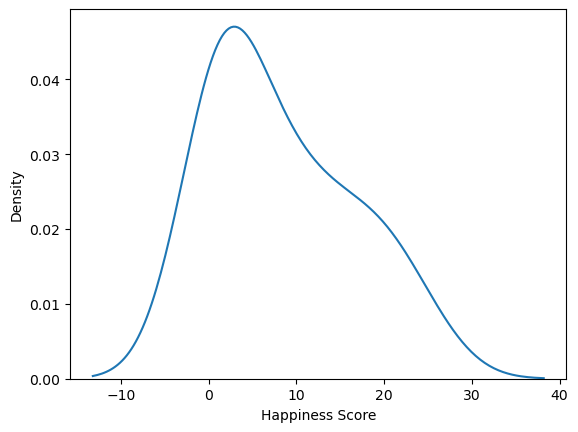

In [25]:
sns.kdeplot(result.value_counts())

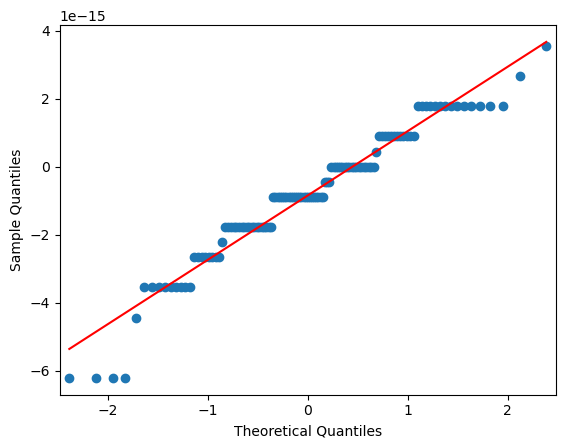

In [26]:
import statsmodels.api as sm
fig = sm.qqplot(result, line='s')

In [27]:
predict_y_test = lm.predict(x_test)

In [28]:
score = r2_score(predict_y_test, y_test)
score

0.788101043870504

In [29]:
result = predict_y_test - y_test

In [30]:
result.value_counts()

-0.033933    1
 0.104584    1
-0.155630    1
-0.279623    1
-0.023207    1
 0.065226    1
 0.726997    1
 0.407301    1
 0.732815    1
 0.410470    1
 0.408698    1
-0.051581    1
 0.458055    1
-0.128535    1
 0.527019    1
 0.374648    1
-0.377078    1
-0.166695    1
-0.033570    1
-0.469896    1
-0.638262    1
-0.265538    1
-0.320257    1
 0.345396    1
 0.250844    1
 0.122221    1
 0.703906    1
 0.454019    1
-0.271752    1
-0.455675    1
-0.173088    1
 0.371819    1
-0.030410    1
Name: Happiness Score, dtype: int64

# ridge 

In [31]:
from sklearn.linear_model import Ridge

In [32]:
ridge = Ridge(normalize = True, random_state = 0)

In [33]:
ridge.fit(x_train, y_train)

C:\Users\ravin\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


Ridge(normalize=True, random_state=0)

In [34]:
pre_y_train = ridge.predict(x_train)

In [35]:
result1 = pre_y_train - y_train

In [36]:
result1

11    -0.384743
43    -0.035412
149    0.562148
52    -0.088270
28    -0.135117
         ...   
73    -0.017945
108    0.119740
15    -0.272504
94     0.027394
104    0.167653
Name: Happiness Score, Length: 117, dtype: float64

C:\Users\ravin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness Score'>

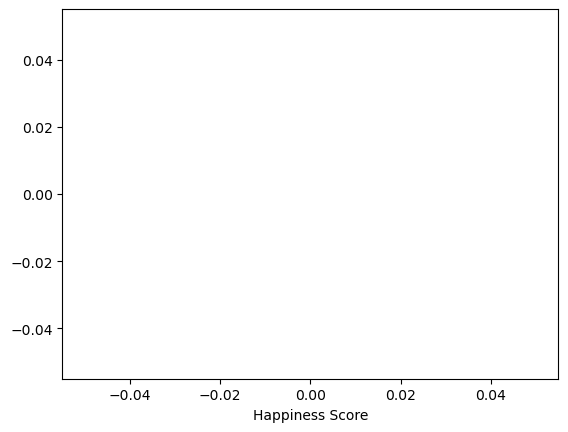

In [37]:
sns.scatterplot(result1.value_counts())

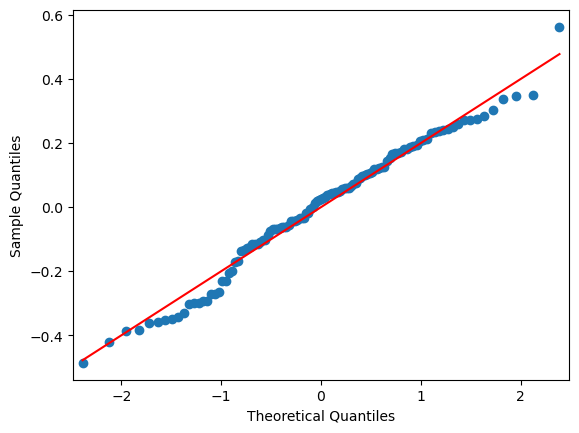

In [38]:
import statsmodels.api as sm
fig = sm.qqplot(result1, line='s')

In [39]:
pre_y_test = ridge.predict(x_test)

In [40]:
result2 = pre_y_test - y_test

C:\Users\ravin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Happiness Score'>

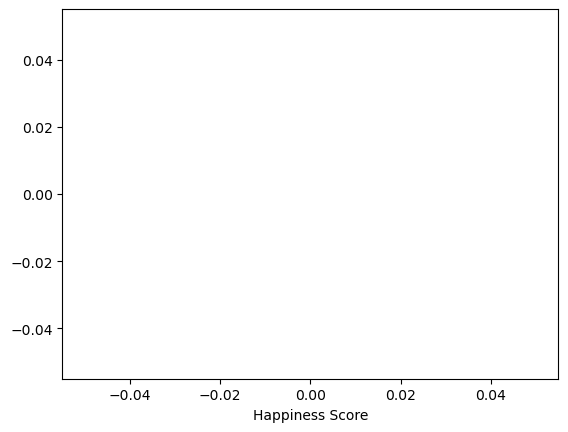

In [41]:
sns.scatterplot(result2.value_counts())

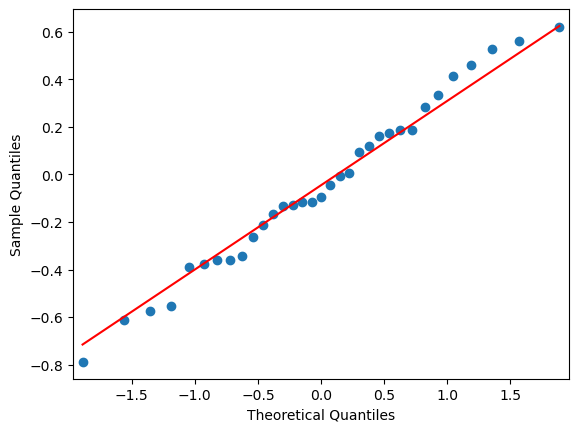

In [42]:
import statsmodels.api as sm
fig = sm.qqplot(result2, line='s')

In [43]:
# random forest regreesor

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
random = RandomForestRegressor()

In [46]:
random.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
pre_y_train = random.predict(x_train)

In [48]:
result = pre_y_train - y_train
result.value_counts()

 0.01087    1
 0.00691    1
 0.00624    1
 0.00104    1
-0.00390    1
           ..
 0.00185    1
 0.00607    1
-0.00021    1
 0.01279    1
 0.00163    1
Name: Happiness Score, Length: 117, dtype: int64

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

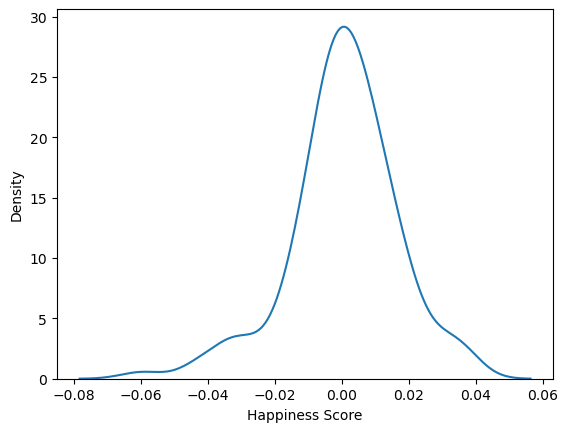

In [49]:
sns.kdeplot(result)

In [50]:
score = r2_score(pre_y_train, y_train)*100
score

99.97780996171741

In [51]:
pre_y_test = random.predict(x_test)

In [52]:
score = r2_score(pre_y_test, y_test)*100
score

99.8766640235972

In [53]:
result1 = pre_y_test - y_test

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

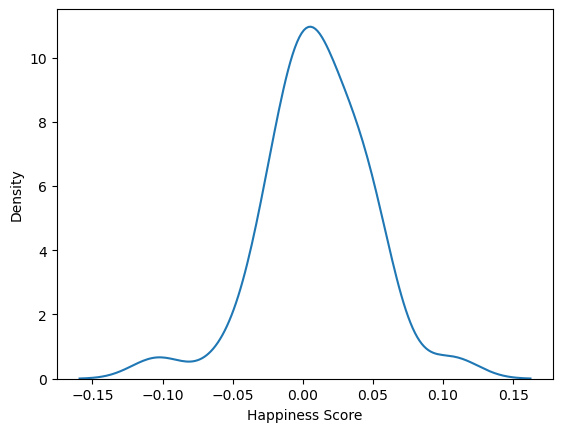

In [54]:
sns.kdeplot(result1)